### Retail Rockets

**Task 1**

<span>When a customer comes to an e-commerce site, he looks for a product with particular properties: price range, vendor, product type and etc. These properties are implicit, so it's hard to determine them through clicks log.</span>

Try to create an algorithm which predicts properties of items in "addtocart" event by using data from "view" events for any visitor in the published log.

**Task 2**

Process of analyzing ecommerce data include very important part of data cleaning. Researchers noticed that in some cases browsing data include up to 40% of abnormal traffic.

Firstly, abnormal users add a lot of noise into data and make recommendation system less effective. In order to increase efficiency of recommendation system, abnormal users should be removed from the raw data.

Secondly, abnormal users add bias to results of split tests, so this type of users should be removed also from split test data.


**Goals**

The main goals is abnormal users of the eshop

**Subgoals**
- Genreate Feature
- Build a model
- Creaet a metric that helps to evaluate quality of the model

### Import Preliminarie s

In [43]:
# Import Modulse
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd


# Other Imports
from matplotlib import rcParams, gridspec

### Functions

In [3]:
# Customer summary stastitics dataframe
def sum_stat(df:pd.DataFrame) -> pd.DataFrame:
    '''
    Plot the summary statitic of a dataframe. The statistics 
    include the normal describe statistics as well as additional
    median value, and counts on the number of unique values and
    null values
    
    Parameters
    ----------
    
    df: A pandas dataframes of datate
    '''
    
    sum_df = pd.concat([df.describe(), 
           pd.DataFrame(df.nunique(), columns=['nuniques']).T,
           pd.DataFrame(np.sum(df.isnull(), axis =0), columns=['isnull']).T],
           axis=0)
    return sum_df


### Import Dataset

I have included a description of each of the datasets that were available in this competition. 

Events: A file containing behavioural information
Item Properties: A file containing item properties
Category Tree: a file descrining the category tree

The data was collected from the real word, no transformations have been made, and all the values are hashed due to confidential issues.The data represents transactions from a 4 and a half month period.

A few examples o fhte behavioural data would be like events, adding something to your cart, transcations. The event outcomes has 3 alternatives; "view", "add to cart", and "transaction." There are 2,756,101 events including 69,332 cards, 22,457 transactions, produced by 1,407,580 unique visitors. 

In [19]:
# Import datasets
ct_df = pd.read_csv('Data/category_tree.csv')
events_df = pd.read_csv('Data/events.csv')
item_properties_df1 = pd.read_csv('Data/item_properties_part1.csv')
item_properties_df2 = pd.read_csv('Data/item_properties_part2.csv')
item_properties_df = pd.concat([item_properties_df1,item_properties_df2], axis=0)

print('Category Tree:',ct_df.shape )
print('Events DataFrame:',events_df.shape )
print('Item Properties:',item_properties_df.shape )

Category Tree: (1669, 2)
Events DataFrame: (2756101, 5)
Item Properties: (20275902, 4)


In [20]:
# View the category tree dataframe
ct_df.head(10)

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
5,231,NaN
6,542,378.0
7,1146,542.0
8,1140,542.0
9,1479,1537.0


In [14]:
# View the events datframe
events_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [15]:
# view the items properties dataframe
item_properties_df.head(10)

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
5,1436065200000,285026,available,0
6,1434250800000,89534,213,1121373
7,1431831600000,264312,6,319724
8,1433646000000,229370,202,1330310
9,1434250800000,98113,451,1141052 n48.000


### Data Integrity

In [16]:
ct_df.isnull().sum()

categoryid     0
parentid      25
dtype: int64

In [18]:
item_properties_df.isnull().sum()

timestamp    0
itemid       0
property     0
value        0
dtype: int64

### Exploratory Analysis

Lets explore each of these tables that the competion has provided individually and then aggregate the data to see if we can pull any insights.

##### Category Tree Data

In [40]:
sum_stat(ct_df)[sum_stat(ct_df).index.isin(['count','min','max','nuniques','isnull'])]

,categoryid,parentid
count,1669.0,1644.0
min,0.0,8.0
max,1698.0,1698.0
nuniques,1669.0,362.0
isnull,0.0,25.0


So we have many unique 1669 unique categories thac could belong to an possible 362 parents categories in any manner. Based on the documentation there is not limit to the depth of the parent and child relationship.

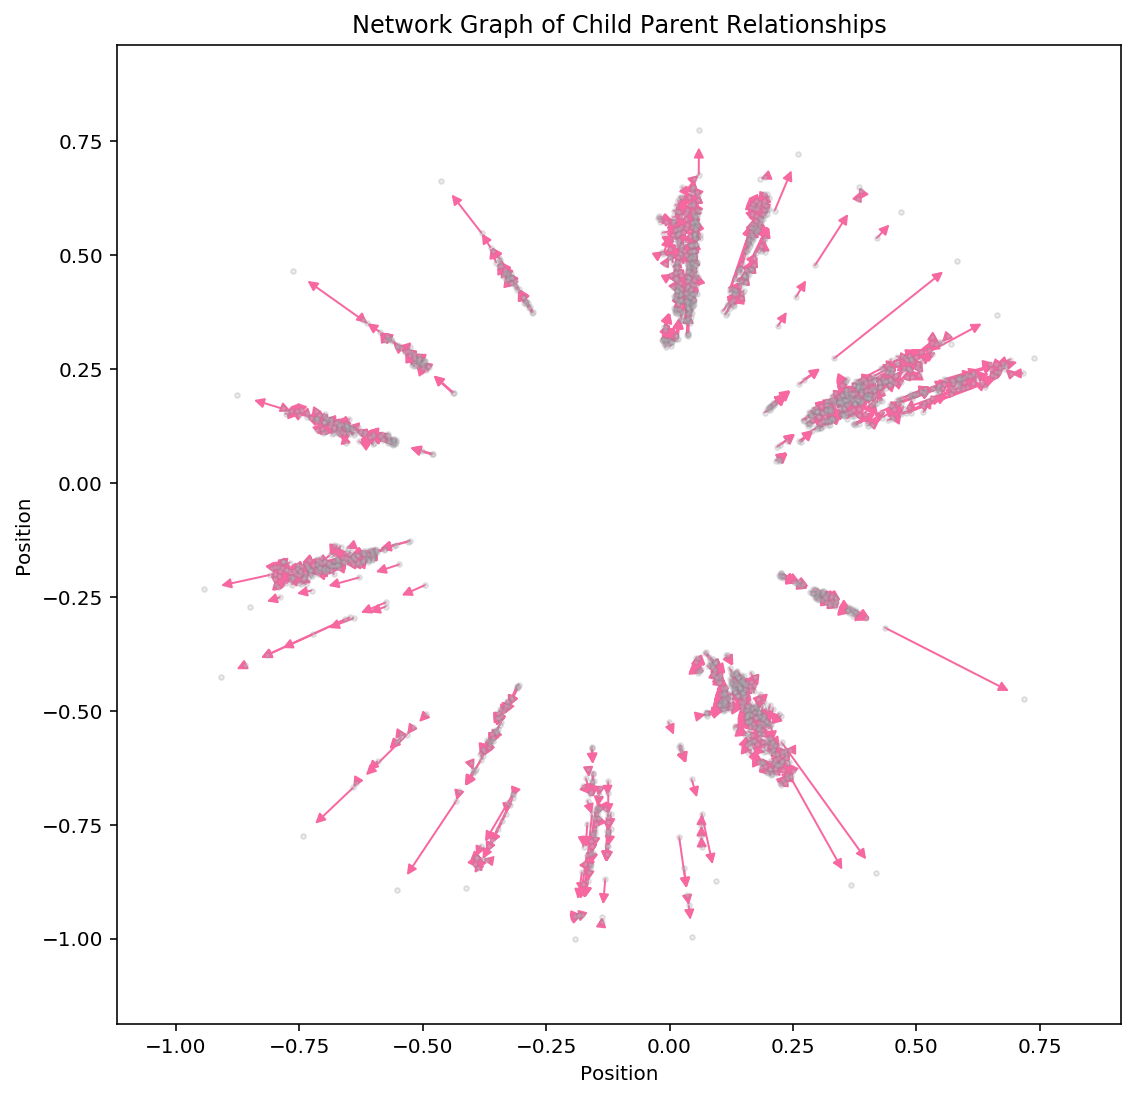

In [45]:
# Set a new default figure size for plotting
rcParams['figure.figsize'] = (9.0, 9.0)

# Create a network graph
G = nx.DiGraph()

# Add the edget to the graph
for i,j in list(ct_df.itertuples(index=False, name=None)):
    G.add_edge(i,j)

# Plot the graph network nodes and edges
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos, alpha=0.25,
                       node_size=5,
                       node_color='#dadaeb',
                       edgecolors='grey');
nx.draw_networkx_edges(G,pos,edge_color='#F768A1',
                       width=1,
                       arrowsize=10,
                      arrowstyle='-|>',
                      )
plt.title('Network Graph of Child Parent Relationships')
plt.xlabel('Position')
plt.ylabel('Position');

You can see that certain categories were merged into others, some never changed very much, and few branches diverged into two branches.